In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
Reward = np.zeros((2000,1000))
vareps = 0.05
for n in range(Reward.shape[0]):
    A = np.zeros((10,1000)) # % Action register
    R = np.zeros((10,1000)) # % Reward register
    Q = np.zeros((10,1000)) # % Value register
    a = np.random.normal(0, 1, 10)
    # Inital
    f = random.randint(0,9)
    A[f,0] = 1
    R[f,0] = np.random.normal(a[f], 1, 1)
    
    # After Inital
    for t in range(1,1000):
        #Determine Action Value estimate using sample average method
        for i in range(10):
            if A[i,t-1] == 1:
                Q[i,t] = np.sum(R[i,0:t])/np.sum(A[i,0:t])
            else:
                Q[i,t] = Q[i,t-1]
                
        M = max(Q[:,t])
        a_s = []
        auxv = random.random()
        if auxv<1-vareps:
            for i in range(10):
                if Q[i,t] == M:
                    a_s.append(i)
                    
            if len(a_s) > 1:  # Multiple greedy actions
                r = random.randint(0,len(a_s)-1)
                k = a_s[r]
            else:   # A greedy action
                k = a_s[0]
        else:
            k = random.randint(0,9)
        
        A[k,t] = 1      # Action Register 
        R[k,t] = np.random.normal(a[k], 1, 1)   #Reward register
        
    Reward[n,:]= [sum([row[i] for row in R]) for i in range(0,len(R[0]))]

KeyboardInterrupt: 

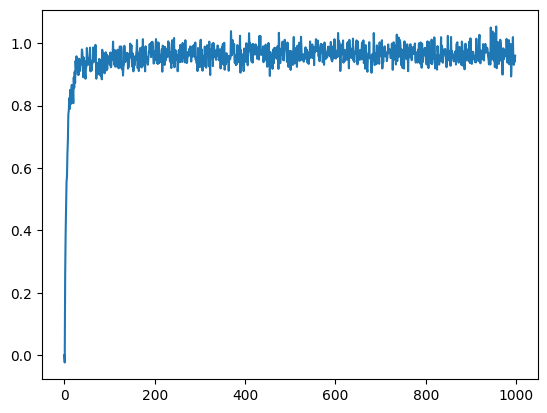

In [25]:
Reward = np.zeros((2000,1000))
vareps = 0.1
for n in range(Reward.shape[0]):
    Q = np.zeros((10,))# % Value register
    a = np.random.normal(0, 1, 10)
    
    # f = random.randint(0,9)
    # Q[f] = np.random.normal(a[f], 1, 1)
    # # After Inital
    for t in range(1,1000):
        #Determine Action Value estimate using sample average method
                
        M = max(Q)
        a_s = []
        auxv = random.random()
        if auxv<1-vareps:
            for i in range(10):
                if Q[i] == M:
                    a_s.append(i)
                    
            if len(a_s) > 1:  # Multiple greedy actions
                r = random.randint(0,len(a_s)-1)
                k = a_s[r]
            else:   # A greedy action
                k = a_s[0]
        else:
            k = random.randint(0,9)
        
        R = np.random.normal(a[k], 1, 1)
        Q[k] = Q[k]+(1/t)*(R-Q[k])   #Reward register
        Reward[n,t] = R

T = np.mean(Reward[:,0:999],axis=0)
plt.plot(T)

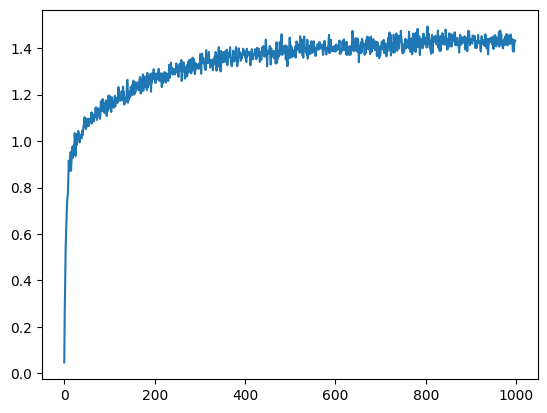

In [11]:
X = np.mean(Reward[:,0:999],axis=0)
# plt.plot(T)
plt.plot(X)
plt.show()

In [32]:
[row[10] for row in R]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3791617901947406, 0.0]

In [22]:
 a = np.random.normal(0, 1, 10)
 a

array([-0.82273103, -0.44560838,  0.43953281,  0.18972876, -0.09589067,
       -0.1342722 , -1.49318423,  1.89659498, -0.81892836, -1.19525005])